## Network Analysis

applying advanced optimization and machine learning enables to make sound and systematic investmetn decisions, improving investment portfolios. This analysis aims to identify patterns in bahaviour of set of stocks based on historical prices using a form of unsupervised learning that only depends on the stock price movements.

The Graphical Analysis algorithm takes the weekly retuns of the stocks as input, feeding it into three unsupervised learning techniques and outputs a graphical network analysis plot visualizing the dependency structure of the stock returns. Each node corresponds to a stock, the colous is defined by the cluster lable from the clustering method. The Affinity propagation algorithm the stocks are located in "neighbourhoods" defined by multi-dimensional scaling algorithm. Each cluster identifies stocks that displays simliar behaviour with regards to interrelationships of stock prices to each other.

Each edge is defined by the sparse inverse covariance matrix. A percision matrix estimated using Graphical Lasso. The higher the strngth value the darler and thicker the edge will be. Indicating that the stocks at the edge are more conditionally correlated.


if you run this analysis over time, you can observe the evolution of clusters within the portfolio.

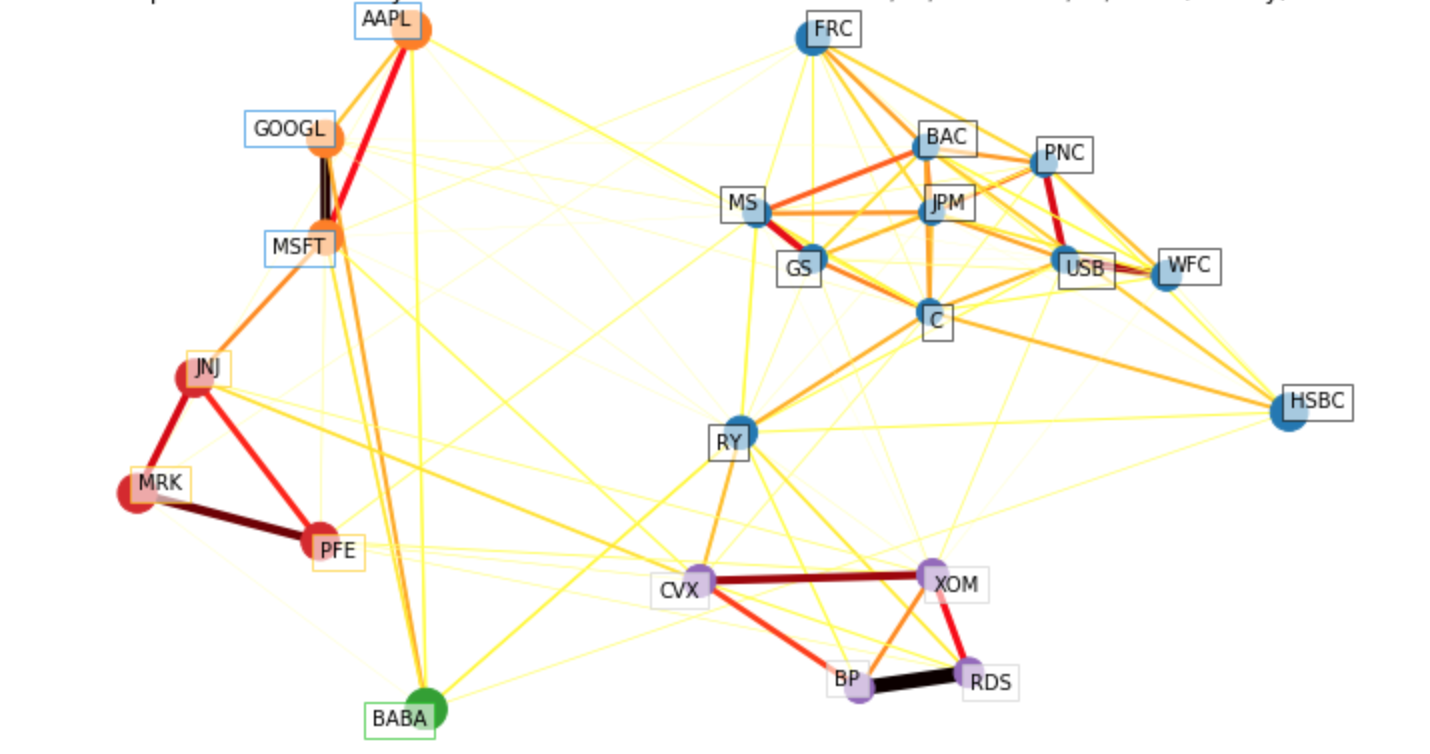



In [2]:

names = ['FRC' 'PNC' 'USB' 'JPM' 'BAC' 'C' 'RY' 'WFC' 'GS' 'MS' 'HSBC' 'JNJ' 'PFE' 'MRK' 'XOM' 'RDS' 'CVS' 'BP' 'AAPL' 'GOOG' 'MSFT' 'BABA' 'TSLA' 'AMZN' '^GSPC']

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf
quotes = yf.download("FRC PNC USB JPM BAC C RY WFC GS MS HSBC JNJ PFE MRK XOM RDS CVS BP AAPL GOOG MSFT BABA TSLA AMZN ^GSPC", start="2000-01-01", end="2020-04-30")

[*********************100%***********************]  25 of 25 completed


In [5]:
close_P = quotes['Close']

In [6]:
data = close_P.pct_change()

In [7]:
import numpy as np
import pandas as pd
WEEKLY_DFS = []

for i in range(len(data.columns)):
    firm = data.columns[i]
    RET = data[firm].dropna(axis=0)
    RET_weekly = (RET+1).resample('W').prod() - 1 # Convert daily data to weekly
    WEEKLY_DFS.append(RET_weekly)

len_WEEKLY_DFS = np.array([len(temp) for temp in WEEKLY_DFS])
Names = data.columns
data_weekly = pd.DataFrame(columns=Names, index=WEEKLY_DFS[np.argmax(len_WEEKLY_DFS)].index)
for i in range(len(Names)):
    data_weekly[Names[i]] = WEEKLY_DFS[i]

In [8]:
data.columns

Index(['AAPL', 'AMZN', 'BABA', 'BAC', 'BP', 'C', 'CVS', 'FRC', 'GOOG', 'GS',
       'HSBC', 'JNJ', 'JPM', 'MRK', 'MS', 'MSFT', 'PFE', 'PNC', 'RDS', 'RY',
       'TSLA', 'USB', 'WFC', 'XOM', '^GSPC'],
      dtype='object')

In [9]:
RET

Date
2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2020-04-23   -0.000539
2020-04-24    0.013918
2020-04-27    0.014714
2020-04-28   -0.005242
2020-04-29    0.026584
Name: ^GSPC, Length: 5112, dtype: float64

In [ ]:
## Plot the individual stock performance (or cumulative return)

col = 4
row = int(np.ceil(len(Names)/col))
f_hei = row * 2.5
f_wid = col * 4
ax = (data_weekly+1).cumprod().plot(subplots=True, layout=(row, col), figsize=(f_wid, f_hei),
                                    logy=True, sharey=True, sharex=True, 
                                    title = 'Individual Stock Performance (Weekly)')
for i in range(col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

In [ ]:
## Read and Edit data into the right format
file_name = 'WTB3MS.csv'
df = pd.read_csv(file_name)

df['DATE']=pd.to_datetime(df['DATE'])
df['WTB3MS'] = pd.to_numeric(df['WTB3MS'], errors='coerce')

RET_data=pd.DataFrame(columns=['RET'], index=df.DATE)
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 # Edit the unit of the return data

RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 # Convert the data to the same weekly frequency as above
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly

TBill

In [ ]:
file_name = 'dataset_summary.xlsx'
sheet_name = 'CRSP'
firms_CRSP = pd.read_excel(file_name, sheet_name)
firms_CRSP

In [ ]:
firms_CRSP.drop(columns = 'PERMNO', inplace = True) # Dropping the PERMNO column
firms_CRSP = firms_CRSP.set_index('Ticker') # Set Ticker as the index of the dataframe
firms_CRSP

In [ ]:
df2 = pd.DataFrame({'Ticker': ['SP500'], 'Name':['S&P 500'], 'Sector':['Market Index']})
df2 = df2.set_index('Ticker')

df3 = pd.DataFrame({'Ticker': ['AMZN'], 'Name':['AMAZON'], 'Sector':['Tech']})
df3 = df3.set_index('Ticker')

df4 = pd.DataFrame({'Ticker': ['TSLA'], 'Name':['TESLA'], 'Sector':['Energy']})
df4 = df4.set_index('Ticker')

firms_CRSP = firms_CRSP.append(df2, sort = 'False') 
 

firms_CRSP

In [ ]:
firms_CRSP = firms_CRSP.append(df3, sort = 'False') 
firms_CRSP = firms_CRSP.append(df4, sort = 'False')

In [ ]:
firms_CRSP

In [ ]:
data_weekly.drop(data_weekly.index[0], inplace = True)
#Dropping the last row since it only has two days (2020-06-29,2020-06-30) of return rather than a whole-week return 
data_weekly.drop(data_weekly.index[-1], inplace = True)
data_weekly

In [ ]:

start_date = data_weekly.index[0]
end_date = data_weekly.index[-1]
TBill = TBill[TBill.index >= start_date] # To match the start date of the Stock Return data
TBill = TBill[TBill.index <= end_date]   # To match the end date of the Stock Return data
TBill

In [ ]:
writer = pd.ExcelWriter('CleanedData_Weekly.xlsx', engine='xlsxwriter')

firms_CRSP.to_excel(writer, sheet_name='Firms Info')
data_weekly.to_excel(writer, sheet_name='Stock Returns')
TBill.to_excel(writer, sheet_name='T-Bill')

writer.save()

In [ ]:
# Import all the necessary packages

import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import csv
from datetime import datetime, timedelta

from sklearn import cluster, covariance, manifold
from matplotlib.collections import LineCollection #for plotting purposes

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the self-defined function from the python file
from Graphical_Analysis_functions import *

In [ ]:
firms_info

In [ ]:
Sectors = firms_info.Sector.unique()
print(Sectors)

In [ ]:
# Load Stock Return dataset 
file_name = 'CleanedData_Weekly.xlsx'
sheet_name = 'Stock Returns'
df = pd.read_excel(file_name, sheet_name, index_col=0)
df.index=pd.to_datetime(df.index)    
data = df.copy()

In [ ]:
# Plot cumulative return for each firm
lo_col = 4
lo_row = int(np.ceil(len(df.columns)/4))
f_hei = lo_row * 2.5
f_wid = lo_col * 4
ax = (data+1).cumprod().plot(subplots=True, layout=(lo_row, lo_col), figsize=(f_wid, f_hei),
                             logy=True, sharex=True, sharey=True,
                             title='Cumulative Return for Individual Stock (Weekly, Log-scale)');
for i in range(lo_col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

In [ ]:
getSumStat(data)

In [ ]:

## Start and End date we are considering:
start_date = '2020-01-01'
end_date   = '2020-06-28'

## Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

## The list of firms we want to drop:
drop_firm = ['RDS']

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True



In [ ]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()
 
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)

In [ ]:
Sectors_list = ['Bank']

graphicalAnalysis_plot_ZOOM_bySector(Sectors_list, con_fig)

In [ ]:
firms_list = ['FRC','JPM','BAC', 'GS', 'MS', 'PNC','C']
print('ZOOM IN View of the Selected Firms:')
print(firms_list)
graphicalAnalysis_plot_ZOOM_byFirm(firms_list, con_fig)

In [ ]:
###########################################   CAN BE CHANGED  #############################################

## Start and End date we are considering:
start_date = '2015-07-01'
end_date   = '2020-06-28'

## Sectors which we will be testing:
Sectors_chosen = ['Bank','Health','Energy','Tech']

## The list of firms we want to drop:
drop_firm = ['RDS']

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True

###########################################   CAN BE CHANGED  #############################################

In [ ]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat, display_IndRet)